# Make Plot to Compare Architectures      

Notebook Author: Aniket Tekawade, Argonne National Laboratory, atekawade@anl.gov   

In [1]:
%matplotlib inline
figw = 8

import sys
import os
import numpy as np
import pandas as pd
    
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set(font_scale = 1)
sns.set_style("whitegrid", {'axes.grid' : False})
import time

In [2]:
# model_tags = ["110d32_set6", "111d32_set6", "110d16_set6", "111d16_set6", "110d8_set6", "111d8_set6"]
model_tags = ["110d32_set6", "110d16_set6", "110d8_set6", "111d16_set6"]
nmodels = len(model_tags)
dfs = dict(zip(model_tags, [0]*nmodels))
for idx, model_tag in enumerate(model_tags):  
    dfs[model_tag] = pd.read_csv(os.path.join('../../model_data/', model_tag + '.csv'))    

## FIGURES WITH ALL SIX MODELS  

use legend = True to get the legend.  

In [3]:
model_tags = ["110d32_set6", "110d16_set6", "110d8_set6", "111d16_set6",
              "111d8_set6", "111d32_set6"]
nmodels = len(model_tags)
dfs = dict(zip(model_tags, [0]*nmodels))
for idx, model_tag in enumerate(model_tags):  
    dfs[model_tag] = pd.read_csv(os.path.join('../../model_data/', model_tag + '.csv'))

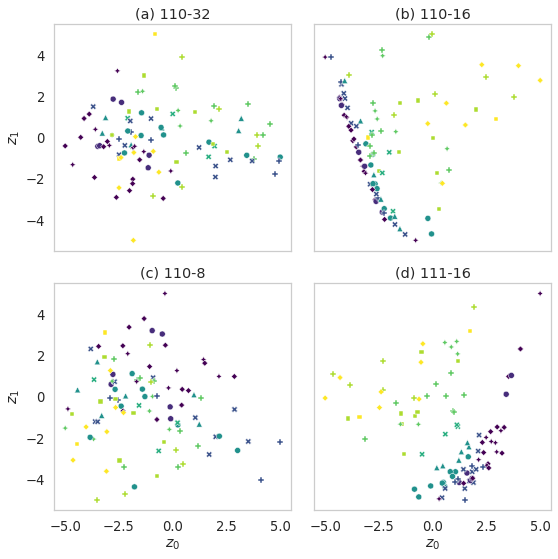

In [4]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
plotnum = ["(a)", "(b)", "(c)", "(d)", "(g)", "(h)"]
fig, ax = plt.subplots(2,2,figsize = (8,8), sharex = True, sharey = True)


for idx in range(4):

    model_tag = model_tags[idx]
    sns.scatterplot(data = dfs[model_tag], x = "$z_0$", y = "$z_1$", \
                    hue = "param", \
                    palette = "viridis", ax = ax.flat[idx], \
                    legend = False, \
                    style = "measurement", )
    modelid = model_tag.split('_')[0].split('d')
    modelid = ('-').join(modelid)
    ax.flat[idx].set_title("%s %s"%(plotnum[idx], modelid))

    
    


    
fig.tight_layout()

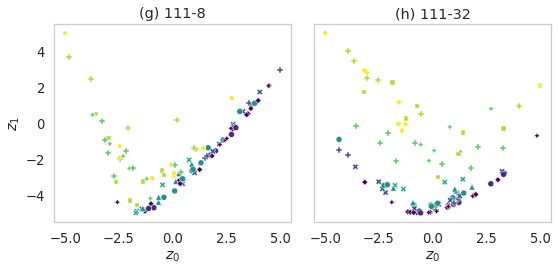

In [5]:
sns.set(font_scale = 1.2)
sns.set_style("whitegrid", {'axes.grid' : False})
plotnum = ["(g)", "(h)"]
fig, ax = plt.subplots(1,2,figsize = (8,4), sharex = True, sharey = True)

ii = 0
for idx in range(4,6):

    model_tag = model_tags[idx]
    sns.scatterplot(data = dfs[model_tag], x = "$z_0$", y = "$z_1$", \
                    hue = "param", \
                    palette = "viridis", ax = ax.flat[ii], \
                    legend = False, \
                    style = "measurement", )
    modelid = model_tag.split('_')[0].split('d')
    modelid = ('-').join(modelid)
    ax.flat[ii].set_title("%s %s"%(plotnum[ii], modelid))
    ii += 1
    
    
# model_tags = ["110d32_set6", "110d16_set6", "110d8_set6", "111d16_set6"]

    
fig.tight_layout()

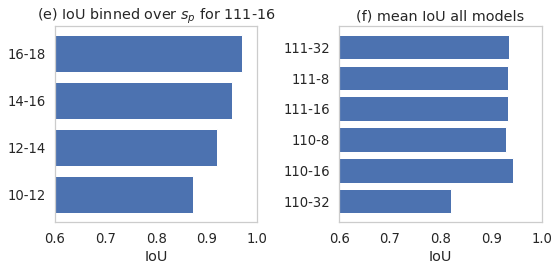

In [6]:
fig, ax = plt.subplots(1,2, sharex = True, figsize = (8,4))
plotnum = ["(e)", "(f)"]

modelids = []
IoU_mean = []
for idx, model_tag in enumerate(model_tags):  
    
    modelid = model_tag.split('_')[0].split('d')
    modelid = ('-').join(modelid)
    IoU_mean.append(np.mean(dfs[model_tag]["IoU"]))
    modelids.append(modelid)

idx = 1
ax.flat[idx].barh(modelids, IoU_mean)
ax.flat[idx].set_xlabel("model id")
ax.flat[idx].set_xlabel("IoU")
ax.flat[idx].set_xlim([0.6,1.0])
ax.flat[idx].set_title("%s mean IoU all models"%plotnum[idx])

idx = 0
model_tag = "111d16_set6"
modelid = model_tag.split('_')[0].split('d')
modelid = ('-').join(modelid)

bins = ["10-12", "12-14", "14-16", "16-18"]
IoU_binned = []
IoU_binned.append(np.mean(dfs[model_tag][dfs[model_tag]["param"].between(10,11,inclusive = True)]["IoU"]))
IoU_binned.append(np.mean(dfs[model_tag][dfs[model_tag]["param"].between(12,13,inclusive = True)]["IoU"]))
IoU_binned.append(np.mean(dfs[model_tag][dfs[model_tag]["param"].between(14,15,inclusive = True)]["IoU"]))
IoU_binned.append(np.mean(dfs[model_tag][dfs[model_tag]["param"].between(16,18,inclusive = True)]["IoU"]))    

ax.flat[idx].barh(bins, IoU_binned)
ax.flat[idx].set_xlabel("param $s_p$")
ax.flat[idx].set_title("%s IoU binned over $s_p$ for %s"%(plotnum[idx], modelid))
ax.flat[idx].set_xlim([0.6,1.0])
ax.flat[idx].set_xlabel("IoU")

fig.tight_layout()

The end!